# Waffle Charts, Word Clouds, And Regression Plots
**Objectives**
- Create Word cloud and Waffle Charts
- Create Regression Plots with Seaborn library

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #needed for waffle charts

import numpy as np
import pandas as pd
from PIL import Image #converting images into arrays
import seaborn as sns
import wordcloud

In [2]:
print('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)
print('Wordcloud version: ', wordcloud.__version__)

Matplotlib version:  3.10.0
Seaborn version:  0.13.2
Wordcloud version:  1.9.4


In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.shape

(195, 39)

In [5]:
df_can.set_index('Country', inplace=True)

## Waffle Charts

In [11]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


**Step 1** The first step into creating a waffle cahrt is determing the proportion of each category with respect to the total.

In [17]:
total_values = df_dsn['Total'].sum() #12094
category_proportions = (df_dsn['Total']/total_values) 

# Print out proportions
pd.DataFrame({'Category Proportion': category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Step 2** The second step is defining the overall size of `waffle` chart

In [18]:
width = 40
height = 10
total_num_tiles = width*height
print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


**Step 3.** The thrid step is using the proportion of each category to determin it respective number of tiles

In [22]:
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

pd.DataFrame({'Number of Tiles': tiles_per_category})

,Number of Tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [25]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [26]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

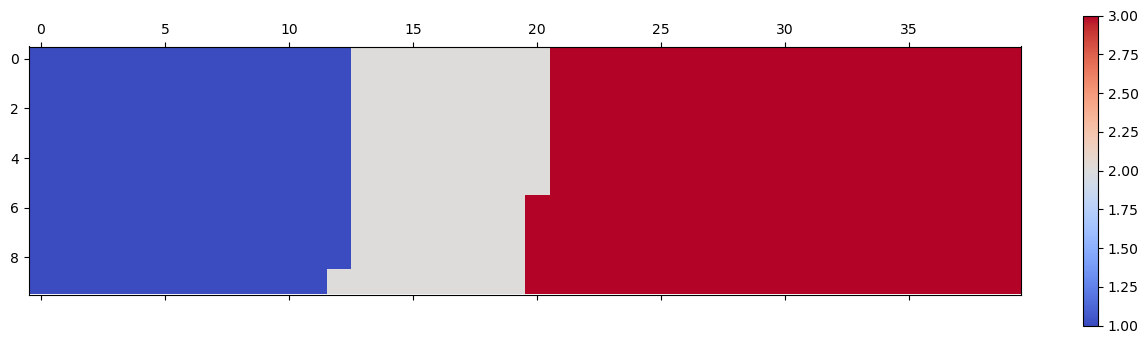

In [27]:
fig = plt.figure()

#use matshow to pisplay the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.

In [28]:
# instantiate a new figure object
fig = plt.figure

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax = plt.gca()
#set minor ticks
ax.set_xticks(np.arrange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arrange(-.5, (height), minor=True))

#add gridlines based on minor ticks
ax.grid(which = 'minor', color='w', linestyle=' ', linewidht=3)

plt.xticks([])
plt.yticks([])
plt.show()

AttributeError: module 'numpy' has no attribute 'arrange'

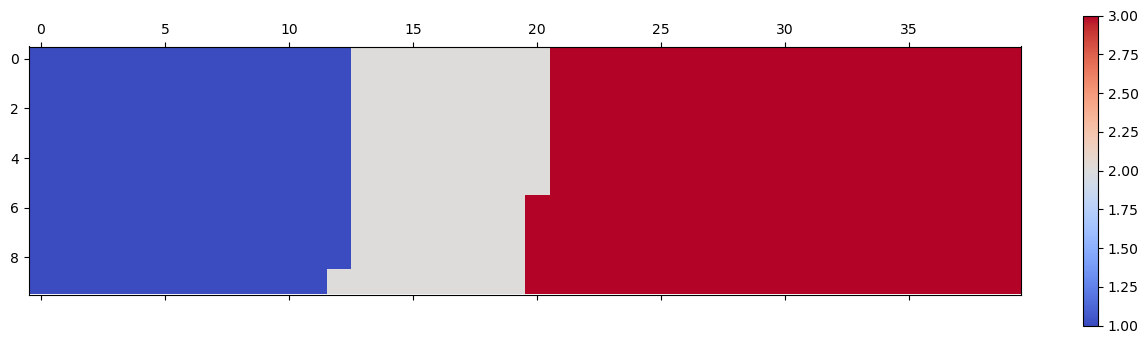

<Figure size 640x480 with 0 Axes>

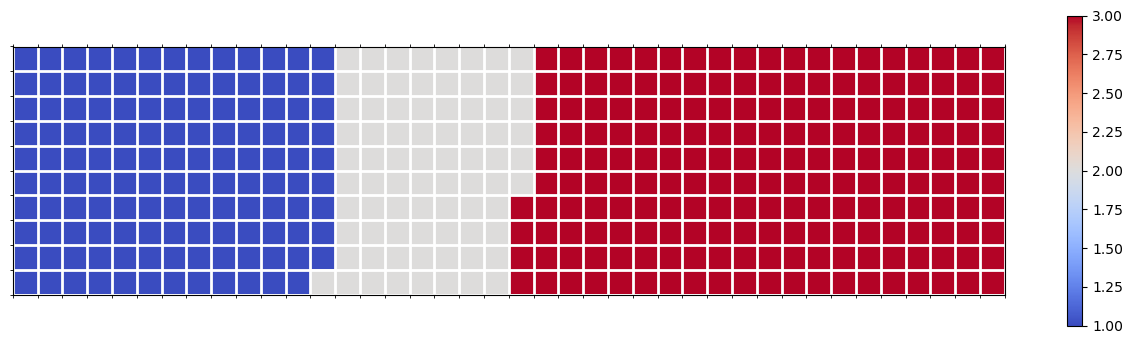

In [29]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

C:\Users\awais\AppData\Local\Temp\ipykernel_12908\2463873726.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\awais\AppData\Local\Temp\ipykernel_12908\2463873726.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
C:\Users\awais\AppData\Local\Temp\ipykernel_12908\2463873726.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

<Figure size 640x480 with 0 Axes>

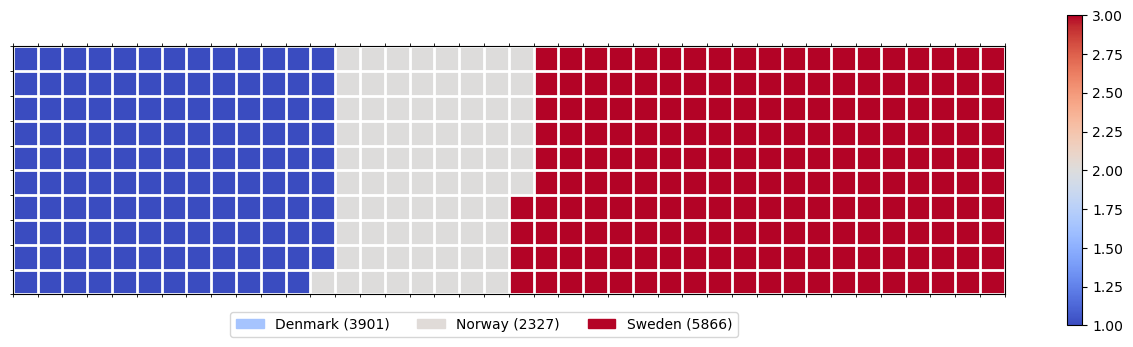

In [30]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

In [31]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height  # total number of tiles
    print('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, width, 1), minor=True)
    ax.set_yticks(np.arange(-.5, height, 1), minor=True)
    
    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i]) / total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()


In [32]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\awais\AppData\Local\Temp\ipykernel_12908\3355819760.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\awais\AppData\Local\Temp\ipykernel_12908\3355819760.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
C:\Users\awais\AppData\Local\Temp\ipykernel_12908\3355819760.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

<Figure size 640x480 with 0 Axes>

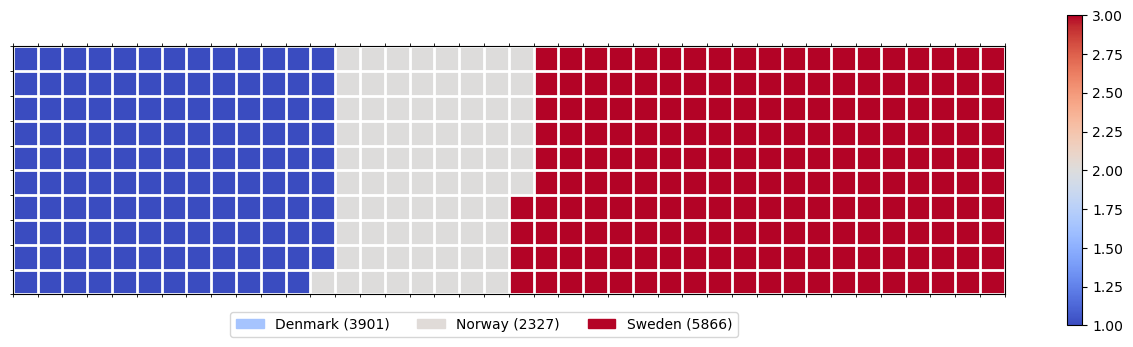

In [33]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

In [35]:
# Import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud Imported')

Wordcloud Imported


In [36]:
import urllib

# open file and it into a variable valice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [37]:
stopwords = set(STOPWORDS)

In [38]:
alice_wc = WordCloud()

alice_wc.generate(alice_novel)

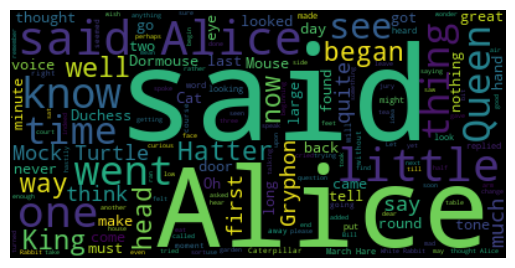

In [39]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

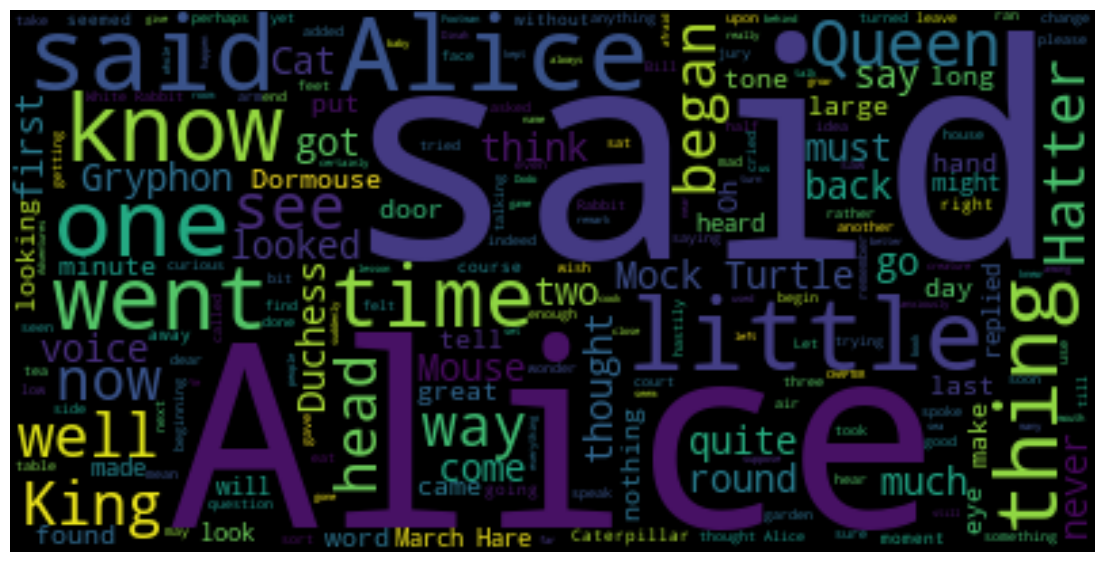

In [40]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

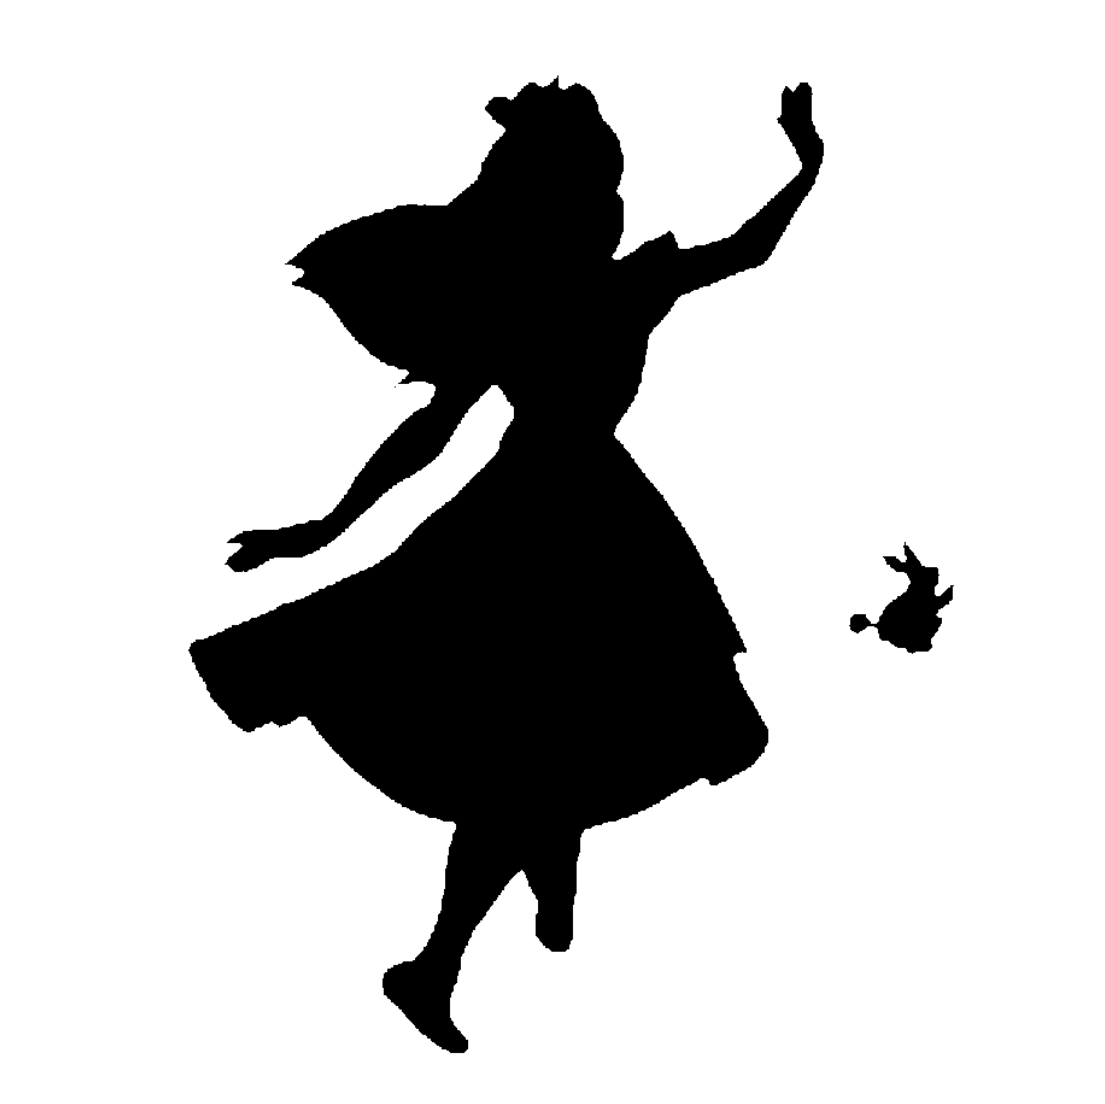

In [42]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

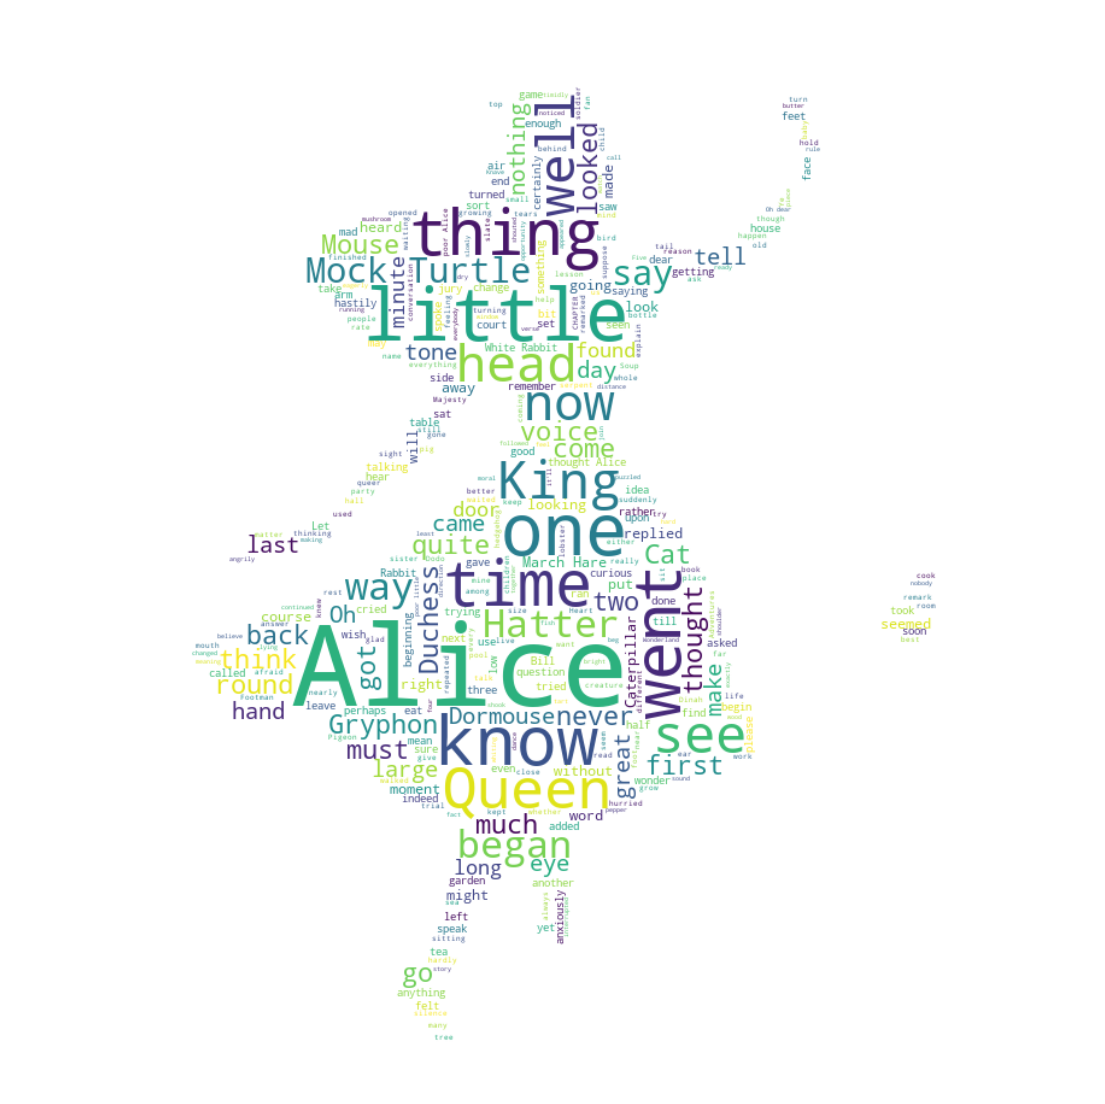

In [43]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
total_immigration = df_can['Total'].sum()
total_immigration

np.int64(6409153)

In [45]:
max_words = 90
word_string = ''
for country in df_can.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [46]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


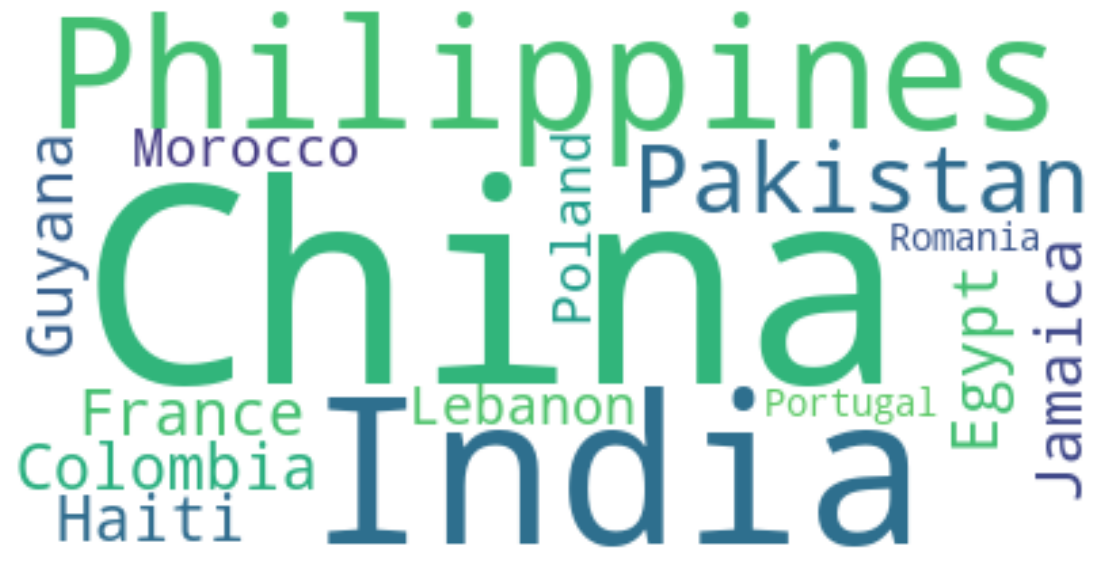

In [47]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Plotting with Seaborn
### Categorical Plots

In [48]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

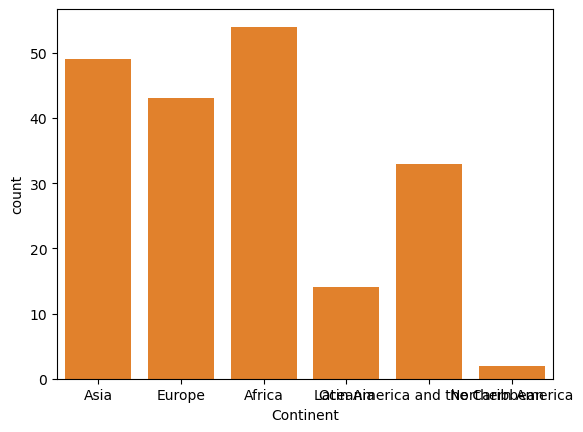

In [50]:
sns.countplot(x='Continent', data=df_can)
plt.show()

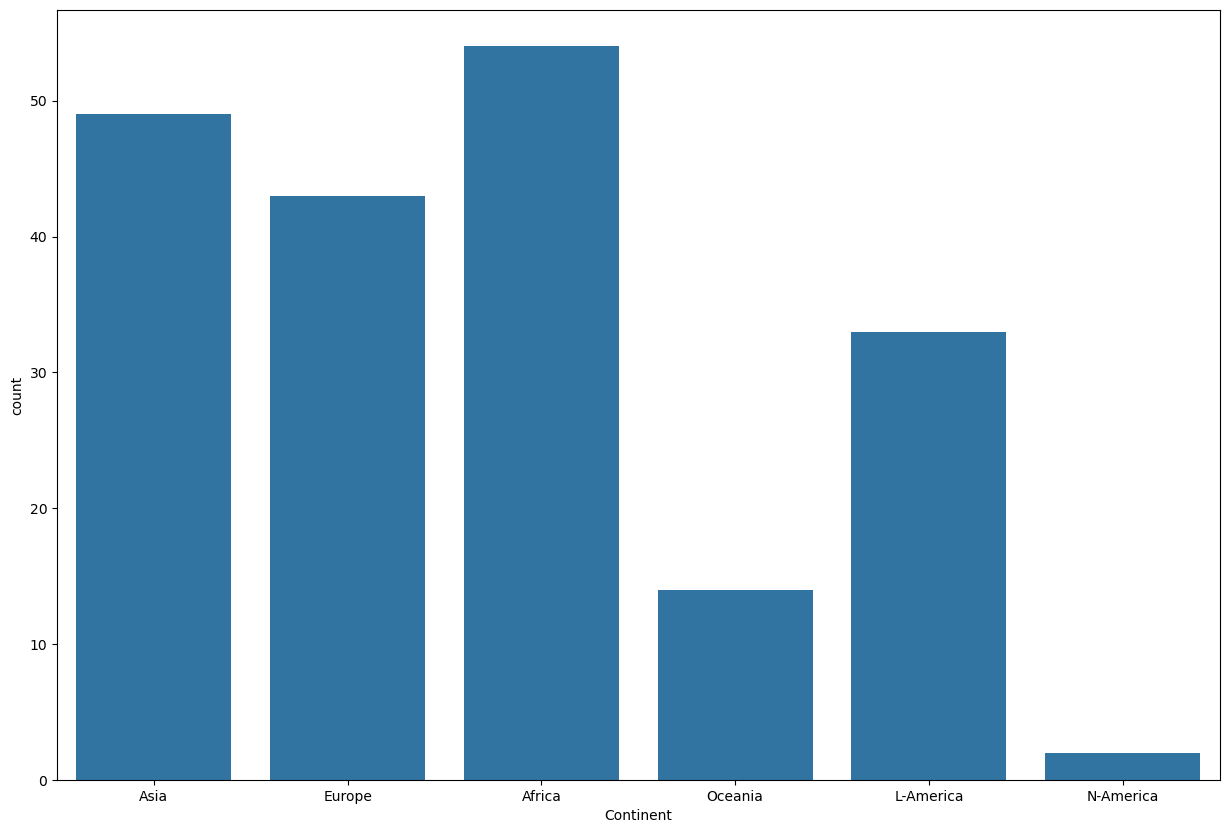

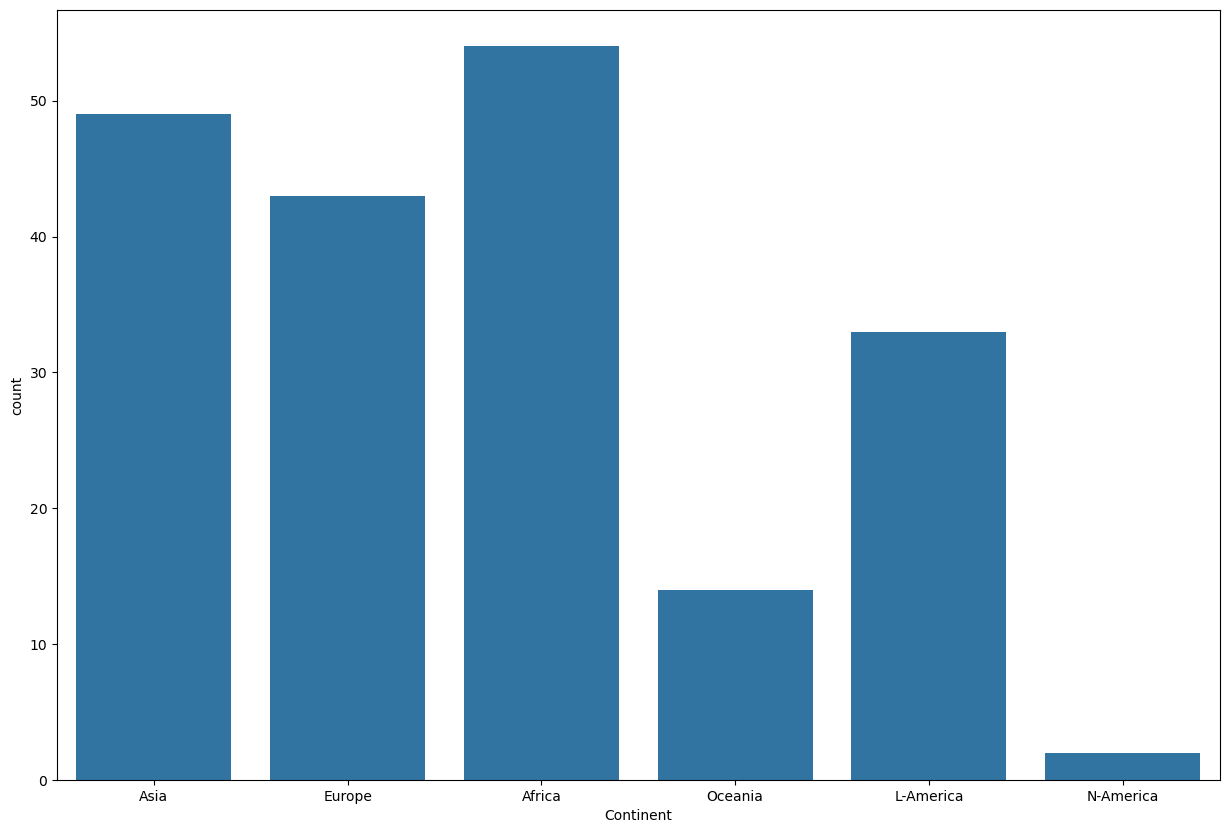

In [52]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America').replace('Northern America', 'N-America')

plt.figure(figsize=(15,10))
sns.countplot(x='Continent', data=df_can1)
plt.show()

In [53]:
df_can['Continent'].value_counts()

Continent
Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: count, dtype: int64

### Barplot
This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidance intervals

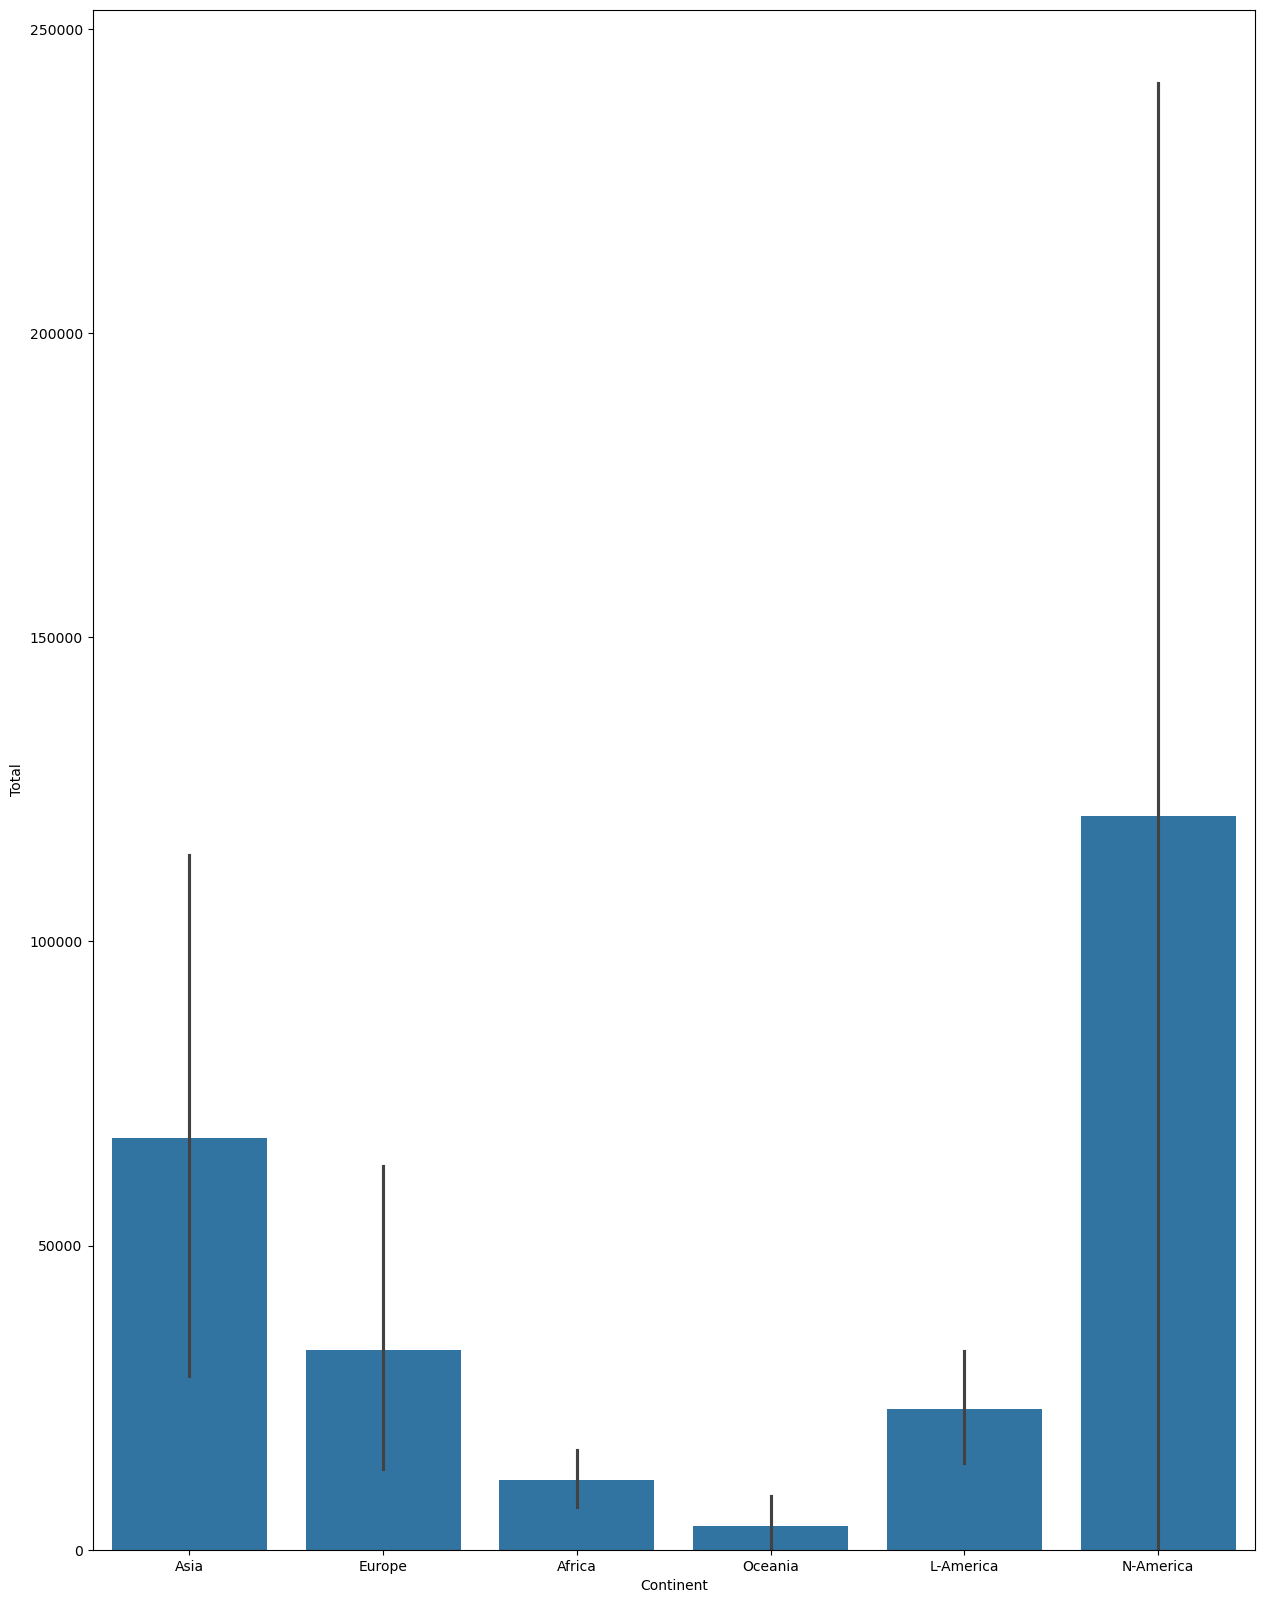

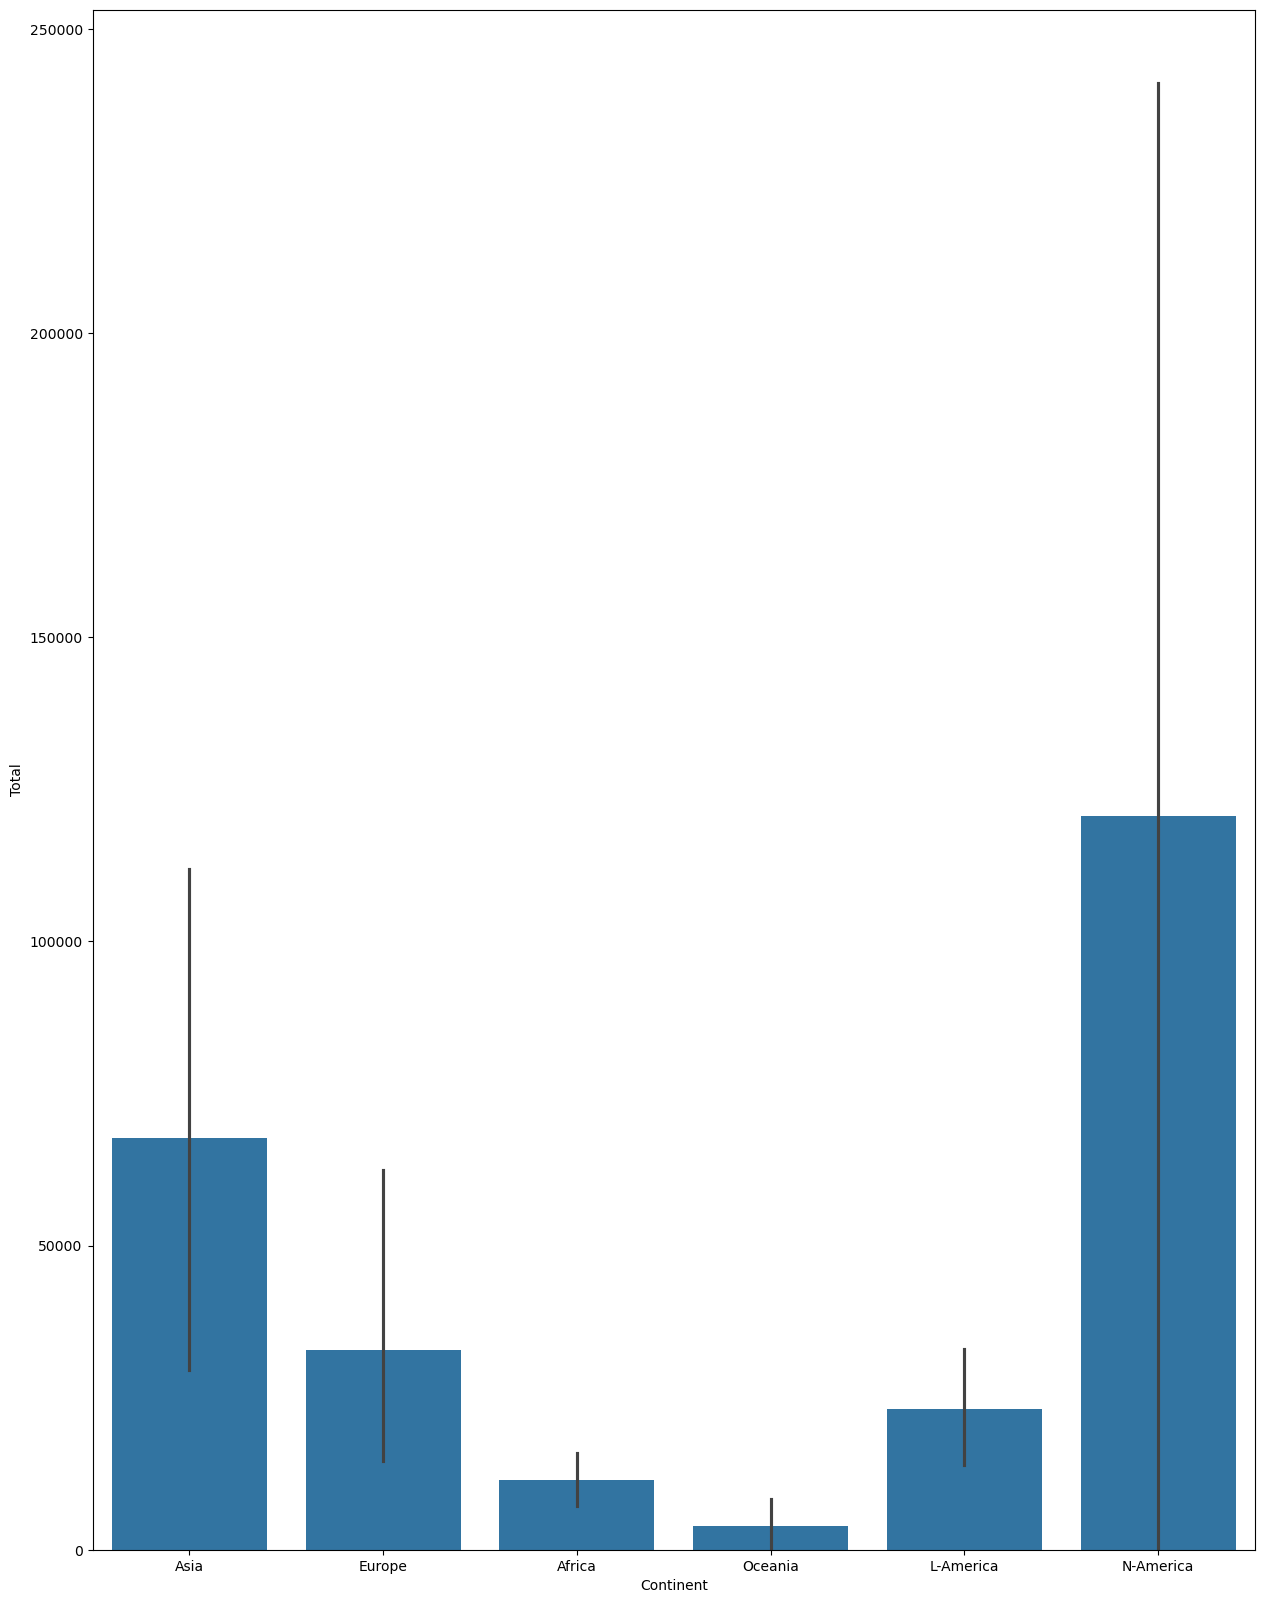

In [55]:
plt.figure(figsize = (15,20))
sns.barplot(x='Continent', y='Total', data=df_can1)
plt.show()

In [56]:
df_can2 = df_can.groupby('Continent')['Total'].mean()
df_can2

Continent
Africa                              11462.000000
Asia                                67710.081633
Europe                              32812.720930
Latin America and the Caribbean     23186.303030
Northern America                   120571.000000
Oceania                              3941.000000
Name: Total, dtype: float64

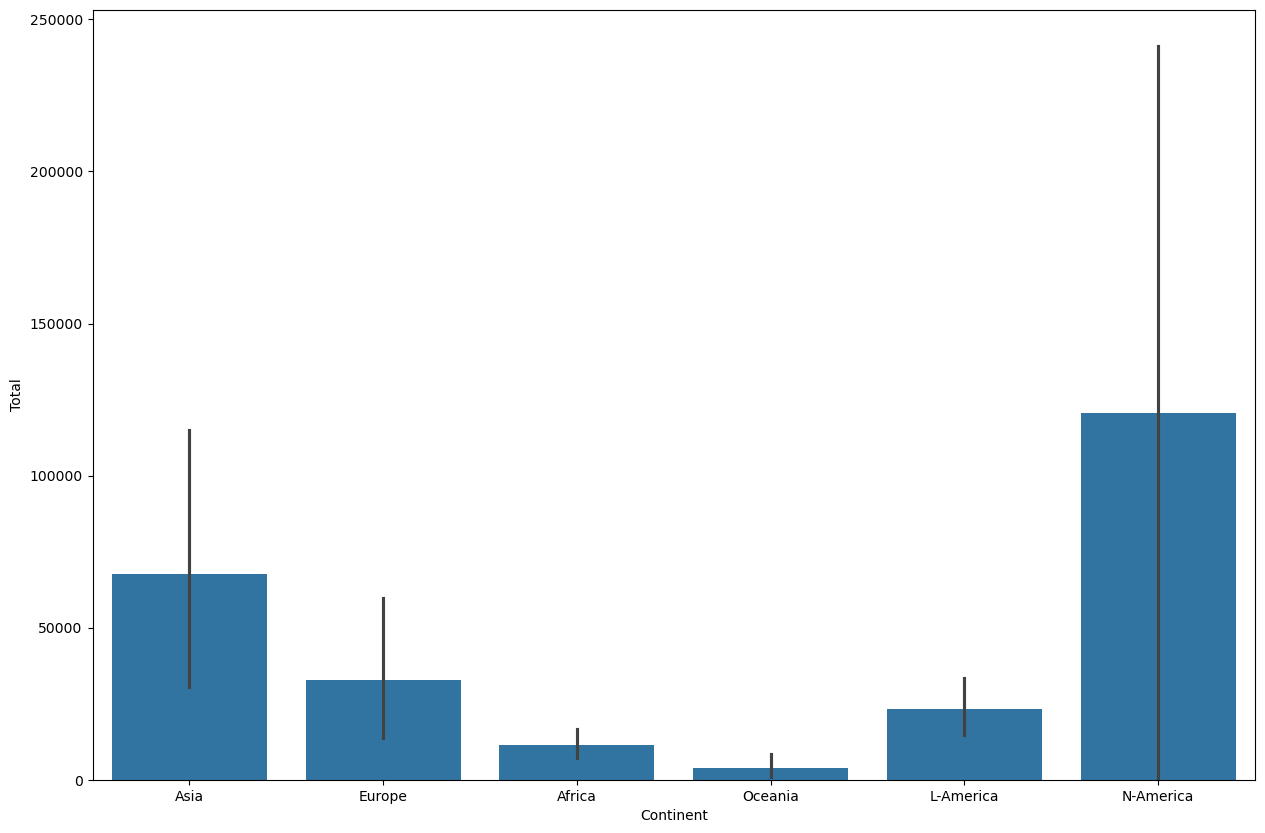

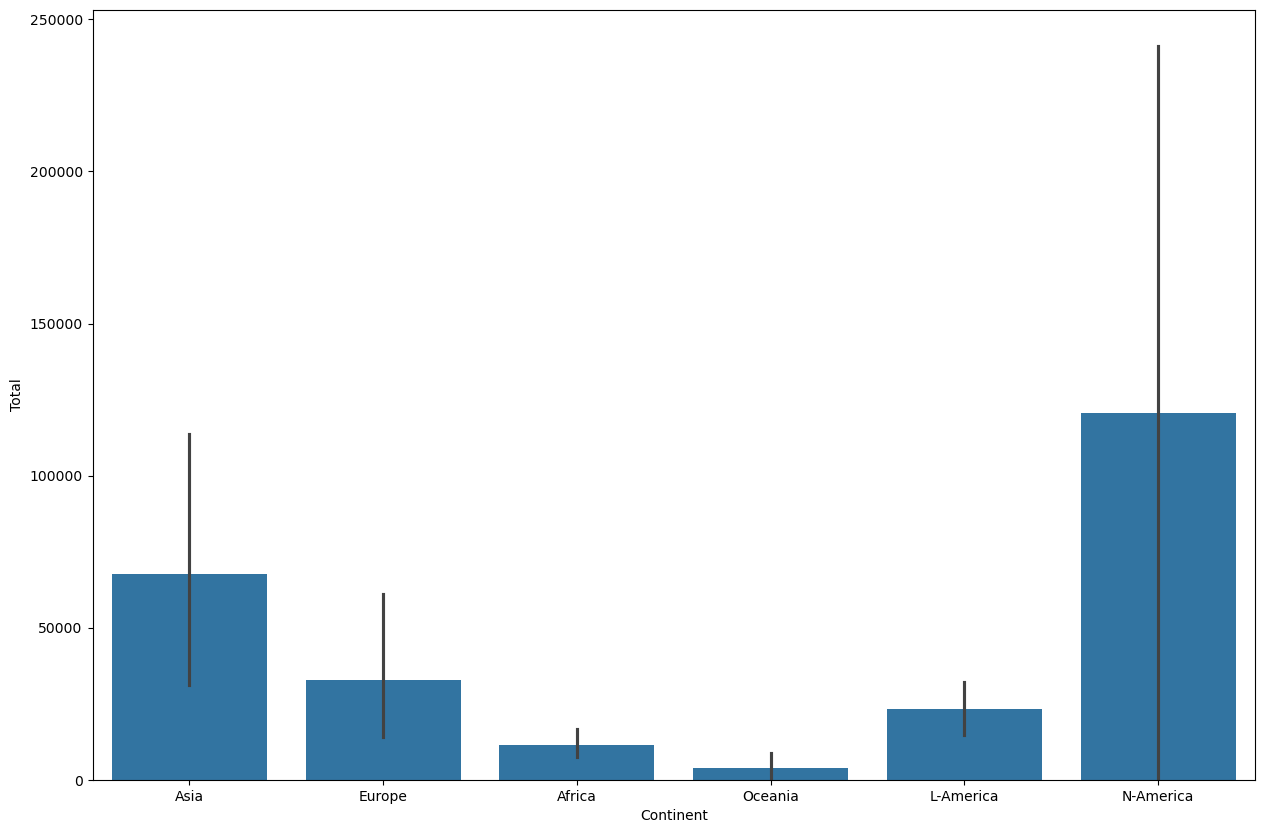

In [58]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)
plt.show()

In [59]:
df_can2 = df_can1.groupby('Continent')['Total'].mean()
df_can2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

### Regression Plot


In [62]:
years = list(map(str, range(1980, 2014)))
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.head(3)

,0
1980,99137
1981,110563
1982,104271


In [64]:
# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

In [65]:
# reset teh index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)
#rename columns
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


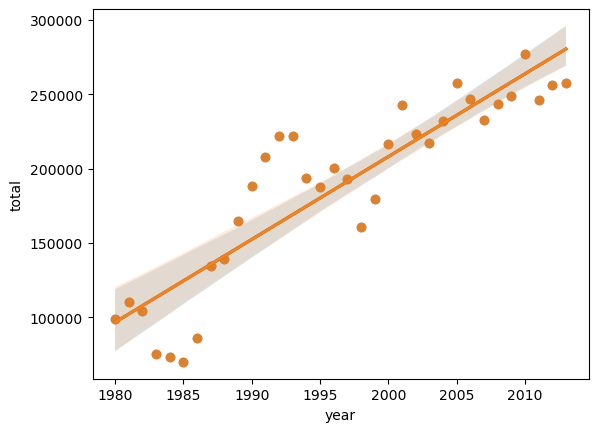

In [67]:
sns.regplot(x='year', y='total', data=df_tot)
plt.show()

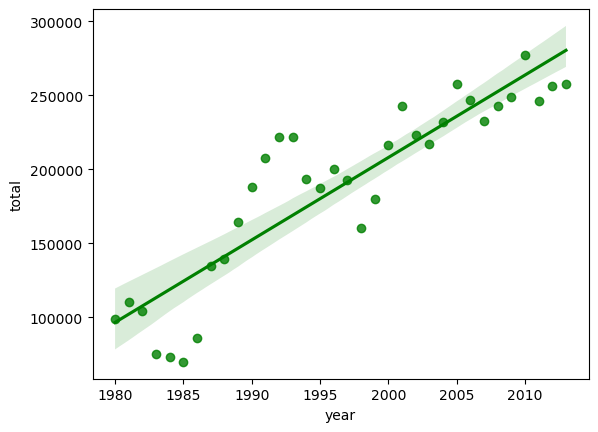

In [68]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

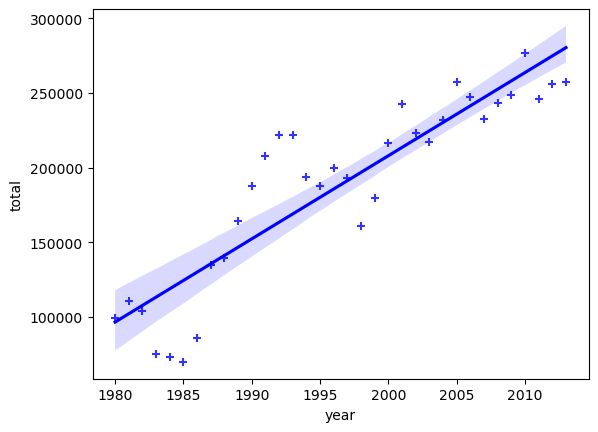

In [69]:
ax = sns.regplot(x = 'year', y='total', data=df_tot, color='blue', marker='+')
plt.show()

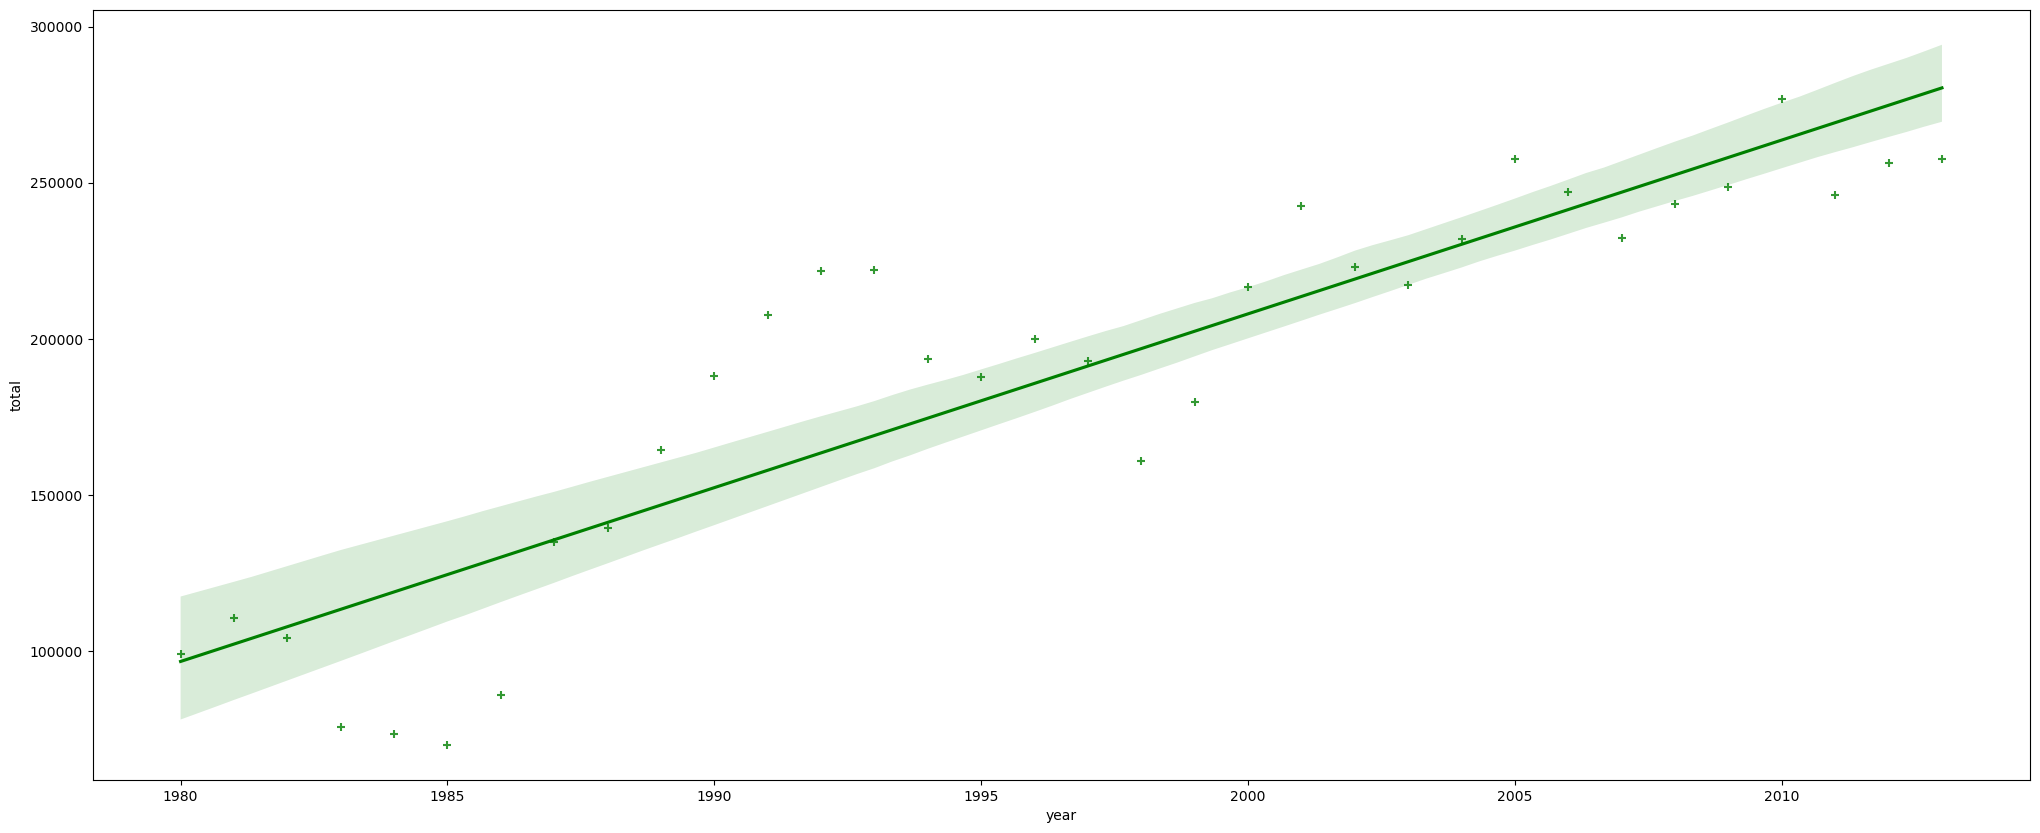

In [72]:
plt.figure(figsize=(25, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

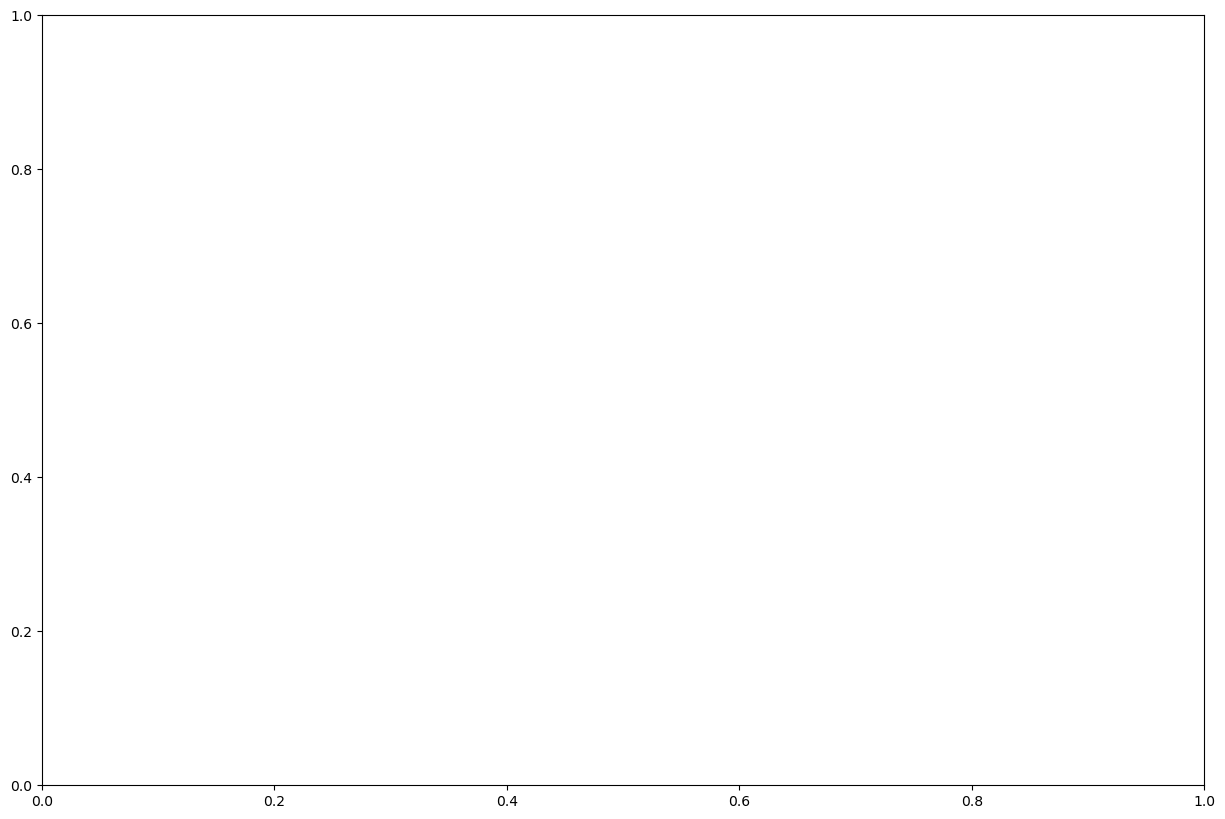

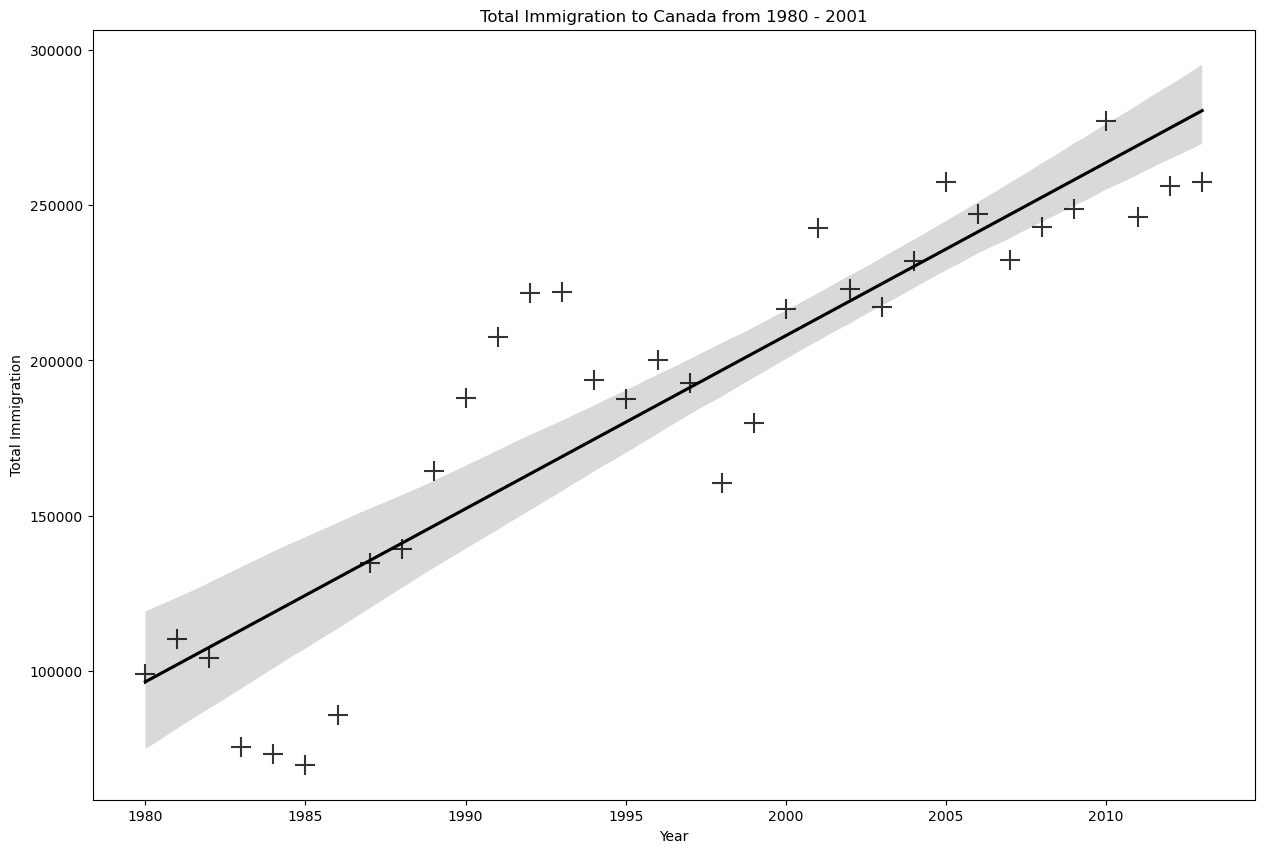

In [74]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color = 'black', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel="Total Immigration")
ax.set_title('Total Immigration to Canada from 1980 - 2001')
plt.show()

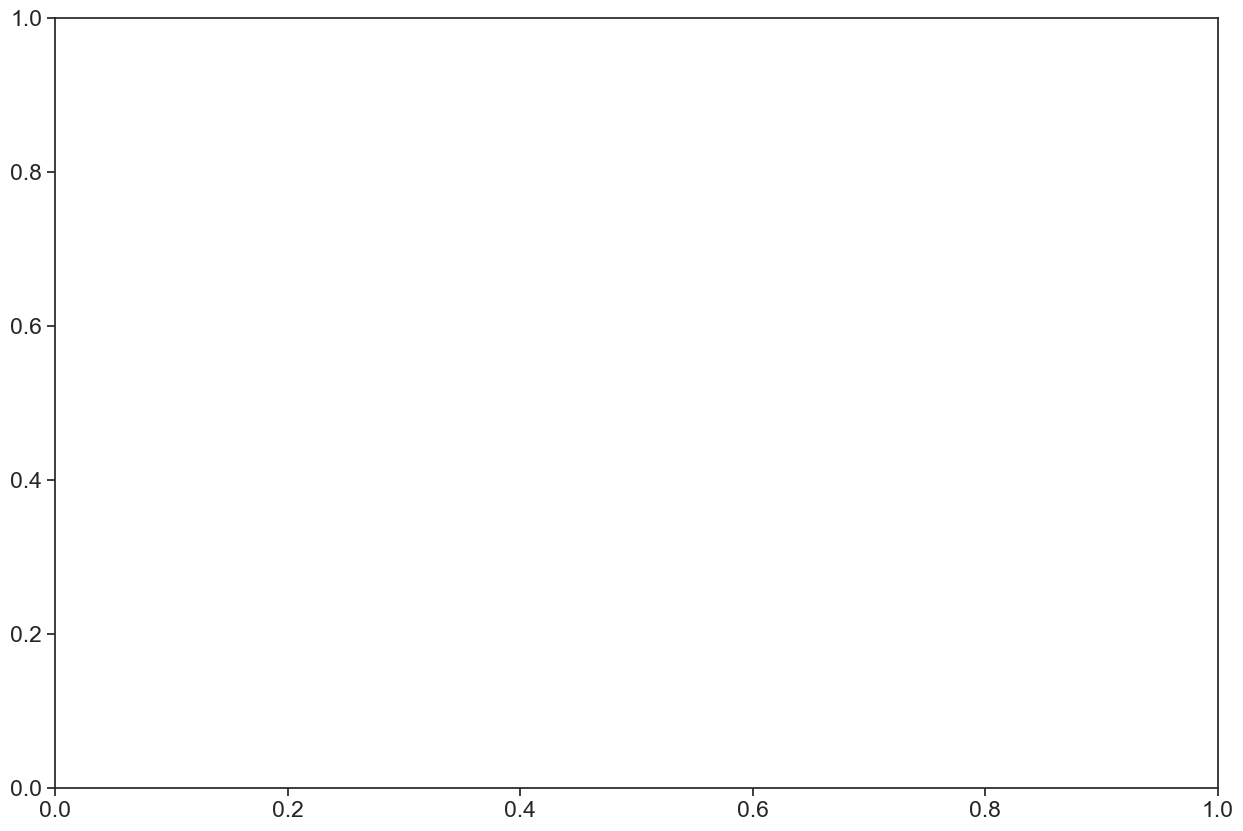

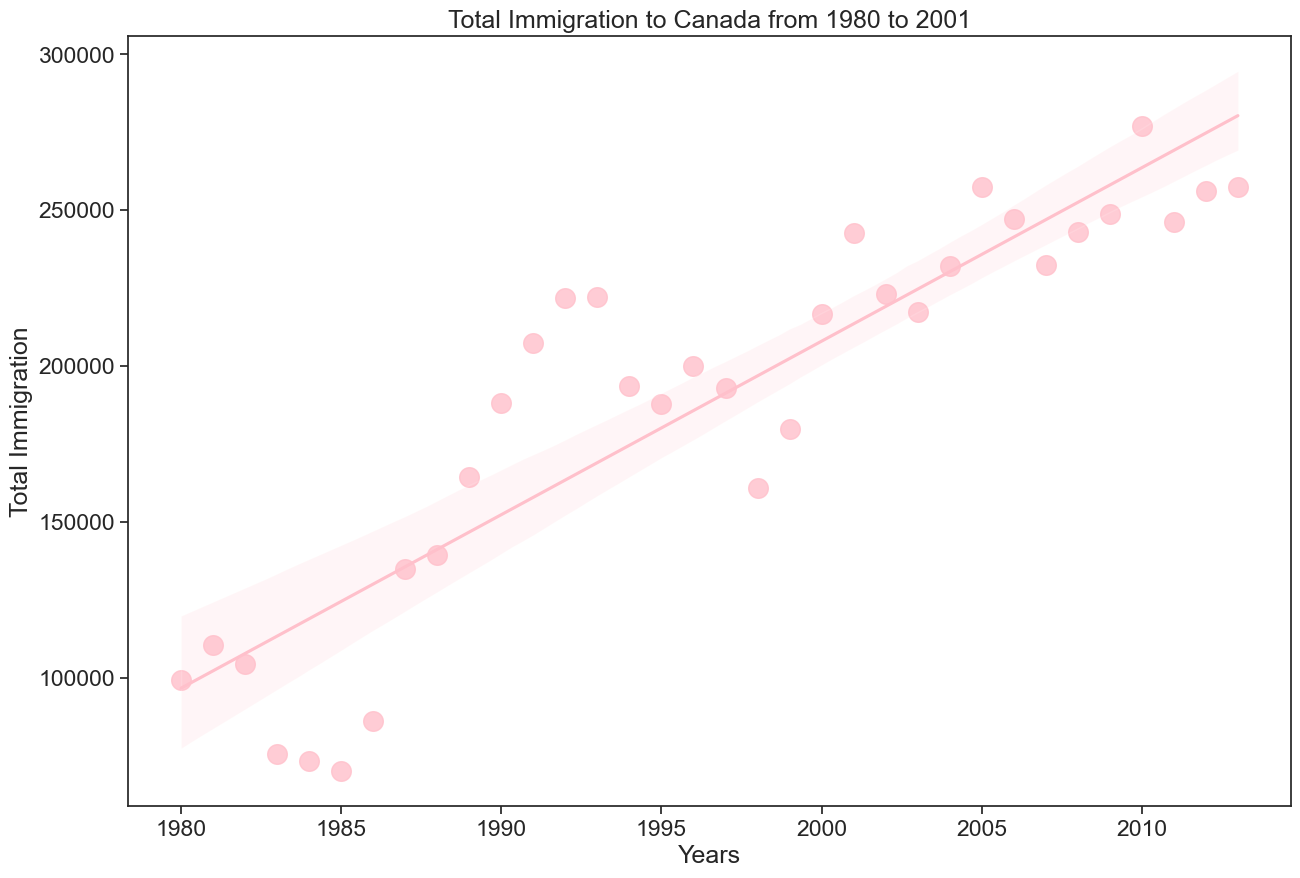

In [76]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x='year', y='total', data = df_tot, color='pink', marker="o", scatter_kws = {'s': 200})
ax.set(xlabel='Years', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 to 2001')
plt.show()

In [1]:

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

NameError: name 'plt' is not defined